high transportation cost 


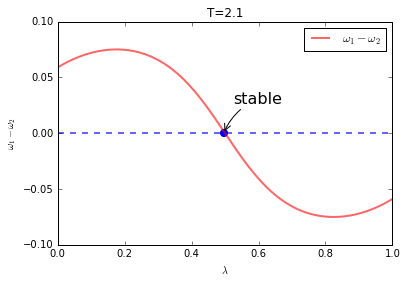

low transportation cost 


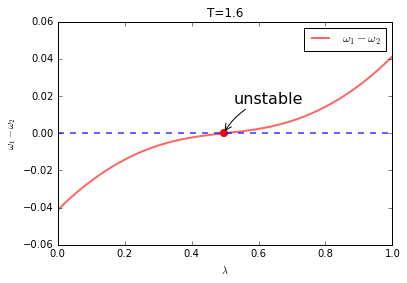

medium transportation cost 


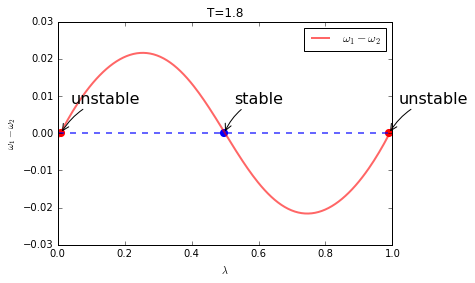

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize

mu=0.4
sigma=5
def delta_omiga(lamda, T):
    for i in range(2):
        def Y(i, w):
            return mu*(i+(-1)**i*lamda)*w[i]+(1-mu)/2
        def g(i, w):
            return (i+(-1)**i*lamda)*w[i]**(1-sigma)
        def h(i, w):
            return (1-i+(-1)**(1-i)*lamda)*(w[1-i]*T)**(1-sigma)
        def G(i, w):
            return (g(i, w)+h(i, w))**(1/(1-sigma))
        def wage(i, w):
            return (Y(i, w)*(G(i, w))**(sigma-1)+Y(1-i, w)*(G(1-i, w)/T)**(sigma-1))**(1/sigma)
        def dwage(i, w):
            return wage(i, w)-w[i]
        def dwage01(w):
            return [dwage(0,w), dwage(1,w)]
    ss=scipy.optimize.fsolve(dwage01,[1,1])
    def omiga(i,w):
        return w[i]*G(i, w)**(-mu)
    return omiga(0, ss)-omiga(1, ss)

def plott(T):
    fig, ax=plt.subplots()
    Lamda=np.linspace(0,1,200)
    Domiga=[]
    L_D=[]
    y=[]
    for lamda in Lamda:
        domiga=delta_omiga(lamda, T)
        Domiga.append(domiga)
        l_d=[lamda, (domiga)**2]
        L_D.append(l_d)
        yy=0
        y.append(yy)
    ax.plot(Lamda, Domiga, 'r-', linewidth=2, label=r'$\omega_1-\omega_2$', alpha=0.6)
    ax.plot(Lamda, y, linewidth=2, alpha=0.6, linestyle='dashed')
    L_D.sort(key=lambda L_D: L_D[1])
    zerolamda=[L_D[0][0],L_D[1][0],L_D[2][0]]
    for x in zerolamda:
        for y in zerolamda:
            if y!=x:
                if (x-y)**2<0.01:
                    zerolamda=[(x+y)/2]
    for z in zerolamda:
        if delta_omiga(z+0.01,T)>delta_omiga(z,T):
            ax.scatter([z, ], [0, ], 50, color='red')
            ax.annotate('unstable', xy=(z, 0), xycoords='data',
             xytext=(+10, +30), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
        else:
            ax.scatter([z, ], [0, ], 50, color='blue')
            ax.annotate('stable', xy=(z, 0), xycoords='data',
             xytext=(+10, +30), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
    ax.legend(loc='upper right')
    ax.set_xlabel(r'$\lambda$')
    ax.set_ylabel(r'$\omega_1-\omega_2$')
    ax.set_xlim(0,1)
    ax.set_title('T={}'.format(T))
    plt.show()

TT=[2.1, 1.6, 1.8]
cost=['high', 'low', 'medium']
for i in range(3):
    T=TT[i]
    print('{} transportation cost '.format(cost[i]))
    plott(T)